In [1]:
import numpy as np
import pandas as pd 
pd.set_option('max_columns',1000)
pd.options.display.float_format = '{:,.4f}'.format
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import time
import itertools
import os
import sys
import random
random.seed(42)
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
# Memory saving function credit to https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    "iterate through all the columns of a dataframe and modify the data type to reduce memory usage."
    start_mem = df.memory_usage().sum() / 1024**2
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB --> {:.2f} MB (Decreased by {:.1f}%)'.format(
        start_mem, end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [16]:
Train = pd.read_csv('/Users/zhangyanpeng/Desktop/PUBG/pubg-finish-placement-prediction/train_V2.csv')
Train = reduce_mem_usage(Train)

Memory usage of dataframe is 983.90 MB --> 339.28 MB (Decreased by 65.5%)


In [27]:
train = Train.copy()

In [29]:
train.dropna(inplace=True)
train.shape

(4446965, 29)

In [31]:
train1 = train.copy()
test = train1[:1111742]
train = train1[1111742:]
print(train.shape)
print(test.shape)

(3335223, 29)
(1111742, 29)


In [33]:
y = test[["Id","winPlacePerc"]]
y

,Id,winPlacePerc
0,7f96b2f878858a,0.4444
1,eef90569b9d03c,0.6400
2,1eaf90ac73de72,0.7755
3,4616d365dd2853,0.1667
4,315c96c26c9aac,0.1875
5,ff79c12f326506,0.0370
6,95959be0e21ca3,0.0000
7,311b84c6ff4390,0.7368
8,1a68204ccf9891,0.3704
9,e5bb5a43587253,0.2143


In [35]:
test.drop(['winPlacePerc'], axis=1, inplace=True)
test.shape

(1111742, 28)

In [ ]:
# train.dropna(inplace=True)
# y = np.array(train1["winPlacePerc"]) 
# X = train1
# feature_list = list(X.columns)
# features = np.array(X)

# train, test, train_labels, test_labels = train_test_split(features,y, test_size = 0.25,random_state = 42)
# test = test.drop(['winplacePerc'])

In [4]:
# test = pd.read_csv('/Users/zhangyanpeng/Desktop/PUBG/pubg-finish-placement-prediction/test_V2.csv')
# test = reduce_mem_usage(test)
# print(train.shape, test.shape)

Memory usage of dataframe is 413.18 MB --> 140.19 MB (Decreased by 66.1%)
(4446966, 29) (1934174, 28)


In [30]:
# # train.isnull().sum()
# null_cnt = train.isnull().sum().sort_values()
# print('null count:', null_cnt[null_cnt > 0])
# # dropna
# train.dropna(inplace=True)
# print(train.shape)

In [42]:
def toTapleList(list1,list2):
    return list(itertools.product(list1,list2))

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4446965 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int8
boosts             int8
damageDealt        float32
DBNOs              int8
headshotKills      int8
heals              int8
killPlace          int8
killPoints         int16
kills              int8
killStreaks        int8
longestKill        float32
matchDuration      int16
matchType          object
maxPlace           int8
numGroups          int8
rankPoints         int16
revives            int8
rideDistance       float32
roadKills          int8
swimDistance       float32
teamKills          int8
vehicleDestroys    int8
walkDistance       float32
weaponsAcquired    int16
winPoints          int16
winPlacePerc       float32
dtypes: float32(6), int16(5), int8(14), object(4)
memory usage: 373.2+ MB


In [36]:
train.describe(include=np.number).drop('count').T

,mean,std,min,25%,50%,75%,max
assists,0.2340,0.5886,0.0000,0.0000,0.0000,0.0000,22.0000
boosts,1.1067,1.7156,0.0000,0.0000,0.0000,2.0000,28.0000
damageDealt,130.5291,169.8470,0.0000,0.0000,84.2400,186.0000,"6,375.0000"
DBNOs,0.6578,1.1454,0.0000,0.0000,0.0000,1.0000,53.0000
headshotKills,0.2268,0.6030,0.0000,0.0000,0.0000,0.0000,64.0000
heals,1.3705,2.6813,0.0000,0.0000,0.0000,2.0000,80.0000
killPlace,47.5952,27.4595,1.0000,24.0000,47.0000,71.0000,101.0000
killPoints,504.6702,627.4540,0.0000,0.0000,0.0000,"1,171.0000","2,170.0000"
kills,0.9246,1.5577,0.0000,0.0000,0.0000,1.0000,72.0000
killStreaks,0.5439,0.7108,0.0000,0.0000,0.0000,1.0000,20.0000


In [37]:
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
1111742,813e0bdc3a4664,a903d48a1a6ce4,b24ef772120e9e,0,1,25.5200,0,0,4,47,0,0,0,0.0000,1282,squad-fpp,26,26,1456,0,"2,407.0000",0,0.0000,0,0,"1,650.0000",4,0,0.6800
1111743,9e01695d398509,44a3da8a6798d2,74180f4a80adef,0,1,117.6000,1,0,3,27,0,1,1,15.7700,1815,squad,29,28,1455,1,0.0000,0,0.0000,0,0,"1,143.0000",3,0,0.3929
1111744,63280ddb999a8f,8eaae933429b1a,978060563fc618,0,0,104.8000,1,1,0,21,1025,2,2,10.7600,1869,duo,49,48,-1,1,0.0000,0,0.0000,0,0,290.0000,3,1508,0.1667
1111745,d06c27b583d08b,f2d0a172ea5fc8,96fae137522ce4,0,0,0.0000,0,0,0,96,0,0,0,0.0000,1431,solo-fpp,97,94,1500,0,0.0000,0,0.0000,0,0,0.0000,0,0,0.0000
1111746,2e65d6cac78098,8078220fb1c04e,8897ffae37b0f7,0,2,151.3000,1,0,2,30,1295,1,1,8.2240,1403,squad-fpp,30,30,-1,0,0.0000,0,4.7830,0,0,"2,281.0000",7,1514,0.8276


# Id, groupId, matchId

In [38]:

for c in ['Id','groupId','matchId']:
    print(f'unique [{c}] count:', train[c].nunique())

unique [Id] count: 3335223
unique [groupId] count: 1782617
unique [matchId] count: 47964


# matchType

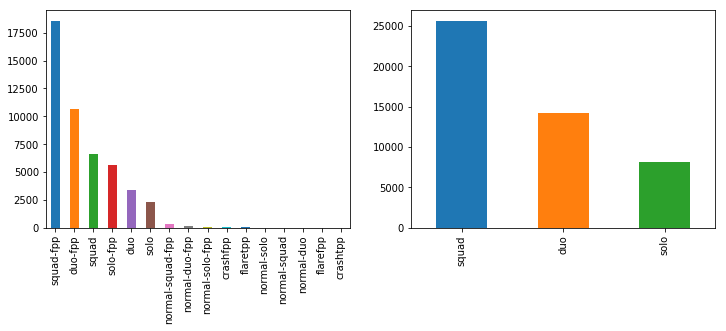

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
train.groupby('matchId')['matchType'].first().value_counts().plot.bar(ax=ax[0])
'''
solo  <-- solo,solo-fpp,normal-solo,normal-solo-fpp
duo   <-- duo,duo-fpp,normal-duo,normal-duo-fpp,crashfpp,crashtpp
squad <-- squad,squad-fpp,normal-squad,normal-squad-fpp,flarefpp,flaretpp
'''
mapper = lambda x: 'solo' if ('solo' in x) else 'duo' if ('duo' in x) or ('crash' in x) else 'squad'
train['matchType'] = train['matchType'].apply(mapper)
train.groupby('matchId')['matchType'].first().value_counts().plot.bar(ax=ax[1])

# numGroups,maxplace

In [40]:
for q in ['numGroups == maxPlace','numGroups != maxPlace']:
    print(q, ':', len(train.query(q)))

numGroups == maxPlace : 930625
numGroups != maxPlace : 2404598


In [43]:
# describe
cols = ['numGroups','maxPlace']
desc1 = train.groupby('matchType')[cols].describe()[toTapleList(cols,['min','mean','max'])]
# groups in match
group = train.groupby(['matchType','matchId','groupId']).count().groupby(['matchType','matchId']).size().to_frame('groups in match')
desc2 = group.groupby('matchType').describe()[toTapleList(['groups in match'],['min','mean','max'])]

pd.concat([desc1, desc2], axis=1)

numGroups                  maxPlace                   \
                min    mean      max      min    mean      max   
matchType                                                        
duo          1.0000 45.8121  52.0000   3.0000 47.6100  52.0000   
solo         1.0000 91.1108 100.0000   2.0000 93.9039 100.0000   
squad        2.0000 27.0387  37.0000   2.0000 27.9821  37.0000   

          groups in match                  
                      min    mean     max  
matchType                                  
duo                1.0000 42.1658 50.0000  
solo               1.0000 64.6601 87.0000  
squad              1.0000 25.7152 34.0000

# players

In [44]:
match = train.groupby(['matchType','matchId']).size().to_frame('players in match')
group = train.groupby(['matchType','matchId','groupId']).size().to_frame('players in group')
pd.concat([match.groupby('matchType').describe()[toTapleList(['players in match'],['min','mean','max'])], 
           group.groupby('matchType').describe()[toTapleList(['players in group'],['min','mean','max'])]], axis=1)

players in match                 players in group               
                       min    mean     max              min   mean     max
matchType                                                                 
duo                 3.0000 69.7984 87.0000           1.0000 1.6553 56.0000
solo                2.0000 66.7781 87.0000           1.0000 1.0328 47.0000
squad               2.0000 70.2608 92.0000           1.0000 2.7323 52.0000

In [45]:
print(group['players in group'].nlargest(5))
del match,group

matchType  matchId         groupId       
duo        3e029737889ce9  b8275198faa03b    56
squad      b30f3d87189aa6  14d6b54cdec6bc    52
solo       41a634f62f86b7  128b07271aa012    47
duo        7e93ce71ac6f61  7385e5fe214021    32
squad      701c7251415d15  a3bc33847d2304    30
Name: players in group, dtype: int64


In [17]:
''' ex) matchId=='41a634f62f86b7', groupId=='128b07271aa012'
'''
subset = train[train['matchId']=='41a634f62f86b7']
sub_grp = subset[subset['groupId']=='128b07271aa012']

print('matchId==\'41a634f62f86b7\' & groupId==\'128b07271aa012\'')
print('-'*50)
print('players:',len(subset))
print('groups:',subset['groupId'].nunique())
print('numGroups:',subset['numGroups'].unique())
print('maxPlace:',subset['maxPlace'].unique())
print('-'*50)
print('max-group players:',len(sub_grp))
print('max-group winPlacePerc:',sub_grp['winPlacePerc'].unique())
print('-'*50)
print('winPlacePerc:',subset['winPlacePerc'].sort_values().unique())

matchId=='41a634f62f86b7' & groupId=='128b07271aa012'
--------------------------------------------------
players: 97
groups: 34
numGroups: [34]
maxPlace: [97]
--------------------------------------------------
max-group players: 64
max-group winPlacePerc: [0.28119999]
--------------------------------------------------
winPlacePerc: [0.         0.0104     0.0208     0.0312     0.0417     0.0521
 0.0625     0.0729     0.0833     0.0938     0.1042     0.1146
 0.125      0.1354     0.14579999 0.15620001 0.16670001 0.1771
 0.1875     0.1979     0.20829999 0.21879999 0.22920001 0.2396
 0.25       0.2604     0.27079999 0.28119999 0.7604     0.77079999
 0.89579999 0.91670001 0.9896     1.        ]


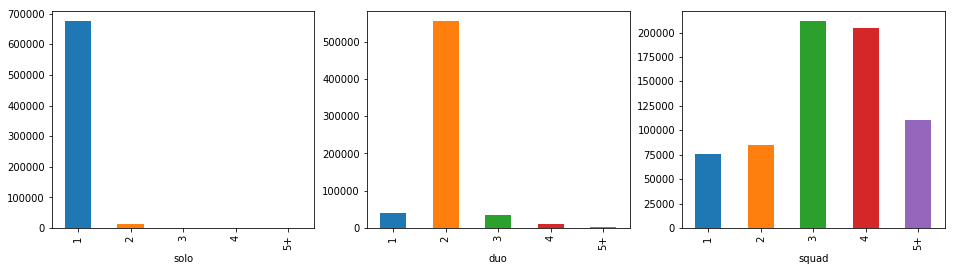

In [18]:
group = train.groupby(['matchId','groupId','matchType'])['Id'].count().to_frame('players').reset_index()
group.loc[group['players'] > 4, 'players'] = '5+'
group['players'] = group['players'].astype(str)

fig, ax = plt.subplots(1, 3, figsize=(16, 4))
for mt, ax in zip(['solo','duo','squad'], ax.ravel()):
    ax.set_xlabel(mt)
    group[group['matchType'] == mt]['players'].value_counts().sort_index().plot.bar(ax=ax)

# matchDuration

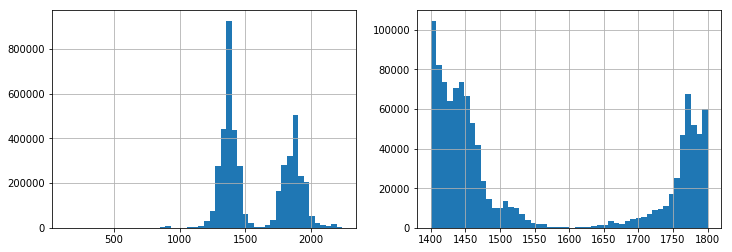

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
# there are two types of maps?
train['matchDuration'].hist(bins=50, ax=ax[0])
train.query('matchDuration >= 1400 & matchDuration <= 1800')['matchDuration'].hist(bins=50, ax=ax[1])

In [22]:
train[train['matchDuration'] == train['matchDuration'].min()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
1206365,28f2bb56074e95,311a5a9adf1a96,e5a77433bc436f,0,0,100.0000,0,1,0,1,0,1,1,0.0000,133,solo,2,2,1500,0,0.0000,0,0.0000,0,0,0.2800,2,0,1.0000
2109739,2a5f4f18fe9e86,f290930a32548a,e5a77433bc436f,0,0,0.0000,0,0,0,2,0,0,0,0.0000,133,solo,2,2,1500,0,0.0000,0,0.0000,0,0,0.0000,2,0,0.0000


In [27]:
train[train['matchDuration'] == train['matchDuration'].max()].head(5)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
130663,8089c9ef1fa09e,3c909156e89431,f8e02cb4c82d7d,0,0,0.0000,0,0,0,72,0,0,0,0.0000,2237,solo,97,92,1510,0,0.0000,0,0.0000,0,0,231.8000,3,0,0.2604
139317,3049d51e07bab3,4086a790e99513,f8e02cb4c82d7d,0,0,100.0000,0,0,0,34,0,1,1,7.2170,2237,solo,97,92,1503,0,0.0000,0,0.0000,0,0,696.0000,7,0,0.4583
146220,cb3902c30f688c,65400d5cf84ead,f8e02cb4c82d7d,0,0,0.0000,0,0,0,85,0,0,0,0.0000,2237,solo,97,92,1505,0,0.0000,0,0.0000,0,0,99.9500,1,0,0.1250
246201,80e022ce3a64ff,b668e37229bb2d,f8e02cb4c82d7d,0,1,96.2500,0,1,0,35,0,1,1,20.6700,2237,solo,97,92,1609,0,0.0000,0,0.0000,0,0,"1,395.0000",6,0,0.3750
268239,0e50a3a859d3ab,9dcca2c1beb072,f8e02cb4c82d7d,0,0,0.0000,0,0,0,41,0,0,0,0.0000,2237,solo,97,92,1497,0,0.0000,0,0.0000,0,0,121.7000,3,0,0.9062


In [28]:
(train.groupby('matchId')['matchDuration'].nunique() > 1).any()

False

# boosts, heals

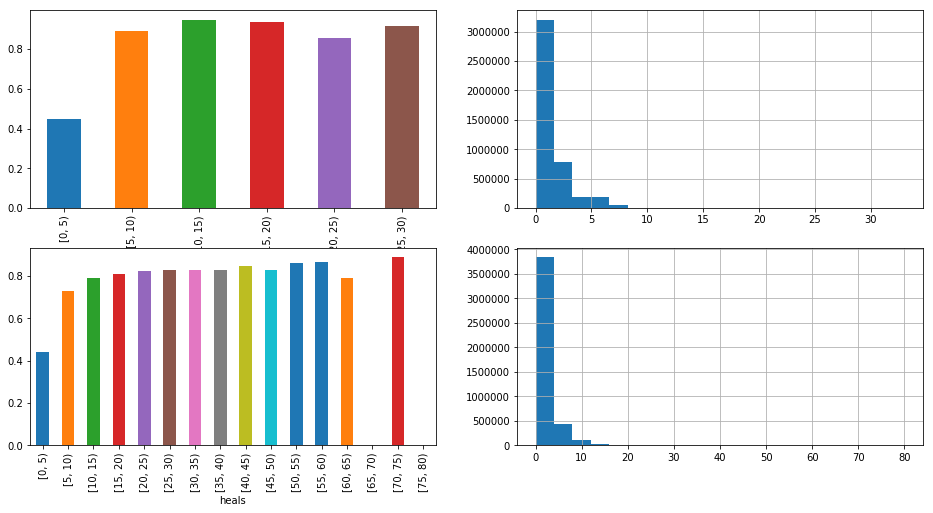

In [29]:
fig, ax = plt.subplots(2, 2, figsize=(16, 8))

cols = ['boosts','heals']
for col, ax in zip(cols, ax):
    sub = train[['winPlacePerc',col]].copy()
    mv = (sub[col].max() // 5) + 1
    sub[col] = pd.cut(sub[col], [5*x for x in range(0,mv)], right=False)
    sub.groupby(col).mean()['winPlacePerc'].plot.bar(ax=ax[0])
    train[col].hist(bins=20, ax=ax[1])

# revives

In [30]:
print('solo player has revives:', 'solo' in train.query('revives > 0')['matchType'].unique())

solo player has revives: False


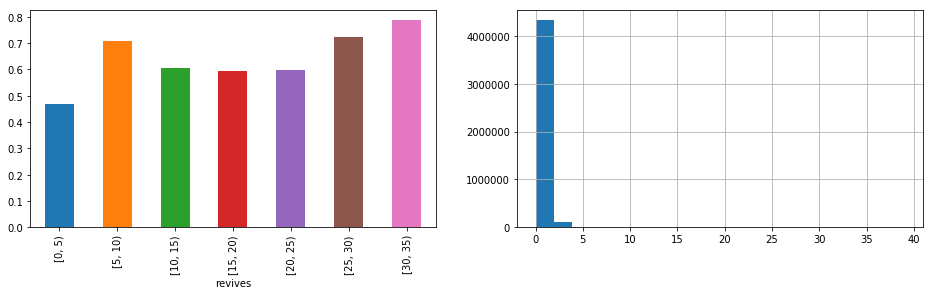

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
col = 'revives'
sub = train.loc[~train['matchType'].str.contains('solo'),['winPlacePerc',col]].copy()
sub[col] = pd.cut(sub[col], [5*x for x in range(0,8)], right=False)
sub.groupby(col).mean()['winPlacePerc'].plot.bar(ax=ax[0])
train[col].hist(bins=20, ax=ax[1])

# killPlace

In [46]:
train.groupby(['matchType'])['killPlace'].describe()[['min','mean','max']]

,min,mean,max
matchType,,,
duo,1.0000,47.4718,100.0000
solo,1.0000,47.4615,100.0000
squad,1.0000,47.7034,101.0000


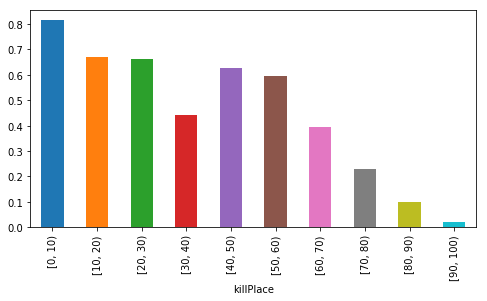

In [47]:
plt.figure(figsize=(8,4))
col = 'killPlace'
sub = train[['winPlacePerc',col]].copy()
sub[col] = pd.cut(sub[col], [10*x for x in range(0,11)], right=False)
sub.groupby(col).mean()['winPlacePerc'].plot.bar()

In [48]:
''' important 
'''
subMatch = train[train['matchId'] == train['matchId'].min()].sort_values(['winPlacePerc','killPlace'])
cols = ['groupId','kills','winPlacePerc','killPlace']
subMatch[cols]

,groupId,kills,winPlacePerc,killPlace
3895898,3a6addfa0df938,0,0.0000,94
3599150,3a6addfa0df938,0,0.0000,95
4367296,236ab9e9c081b9,0,0.0370,88
4131025,236ab9e9c081b9,0,0.0370,89
3088817,236ab9e9c081b9,0,0.0370,90
2290792,236ab9e9c081b9,0,0.0370,91
1998699,236ab9e9c081b9,0,0.0370,92
1425950,236ab9e9c081b9,0,0.0370,93
3961031,e8ff1c0fe7f6aa,0,0.0741,87
4064127,97364d4199bf30,0,0.1111,79


# kill

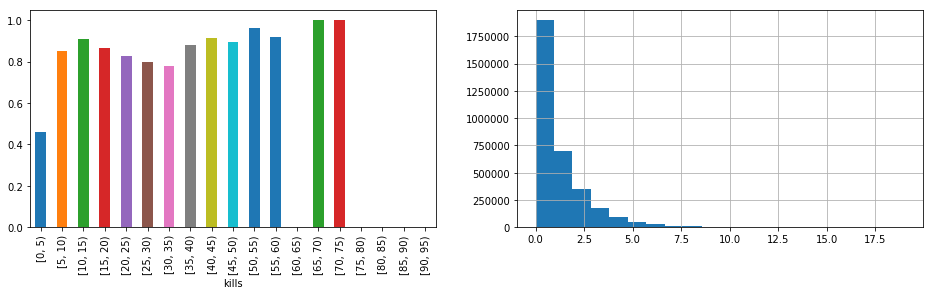

In [49]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))

col = 'kills'
sub = train[['winPlacePerc',col]].copy()
sub[col] = pd.cut(sub[col], [5*x for x in range(0,20)], right=False)
sub.groupby(col).mean()['winPlacePerc'].plot.bar(ax=ax[0])
train[train['kills'] < 20][col].hist(bins=20, ax=ax[1])

In [36]:
sub = train['matchType'].str.contains('solo')
pd.concat([train.loc[sub].groupby('matchId')['kills'].sum().describe(),
         train.loc[~sub].groupby('matchId')['kills'].sum().describe()], keys=['solo','team'], axis=1).T

,count,mean,std,min,25%,50%,75%,max
solo,"8,094.0000",83.4206,27.5924,0.0000,84.0000,89.0000,92.0000,786.0000
team,"39,870.0000",86.2120,17.2690,0.0000,83.0000,87.0000,90.0000,687.0000


# killStreaks, DBNOs

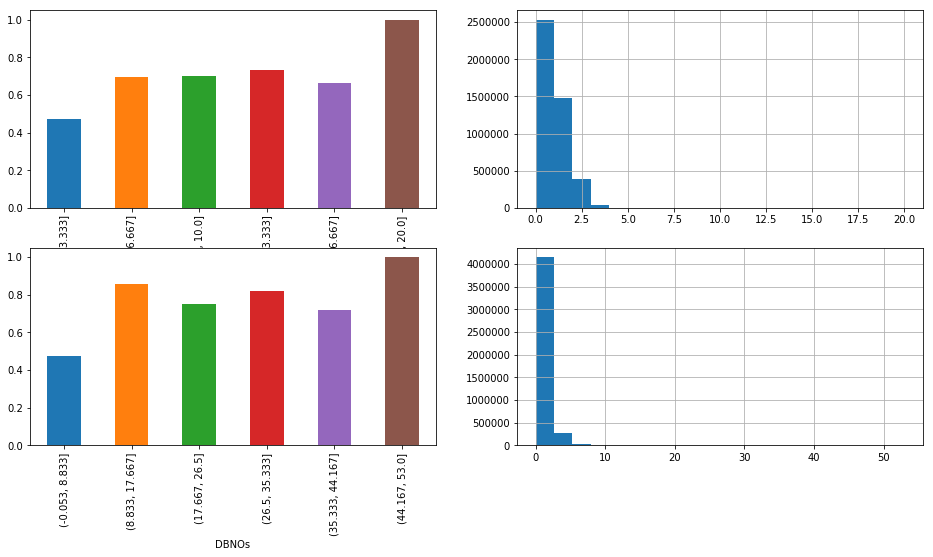

In [37]:
fig, ax = plt.subplots(2, 2, figsize=(16, 8))

cols = ['killStreaks','DBNOs']
for col, ax in zip(cols, ax):
    sub = train[['winPlacePerc',col]].copy()
    sub[col] = pd.cut(sub[col], 6)
    sub.groupby(col).mean()['winPlacePerc'].plot.bar(ax=ax[0])
    train[col].hist(bins=20, ax=ax[1])

# headshotKills, roadKills, teamKills

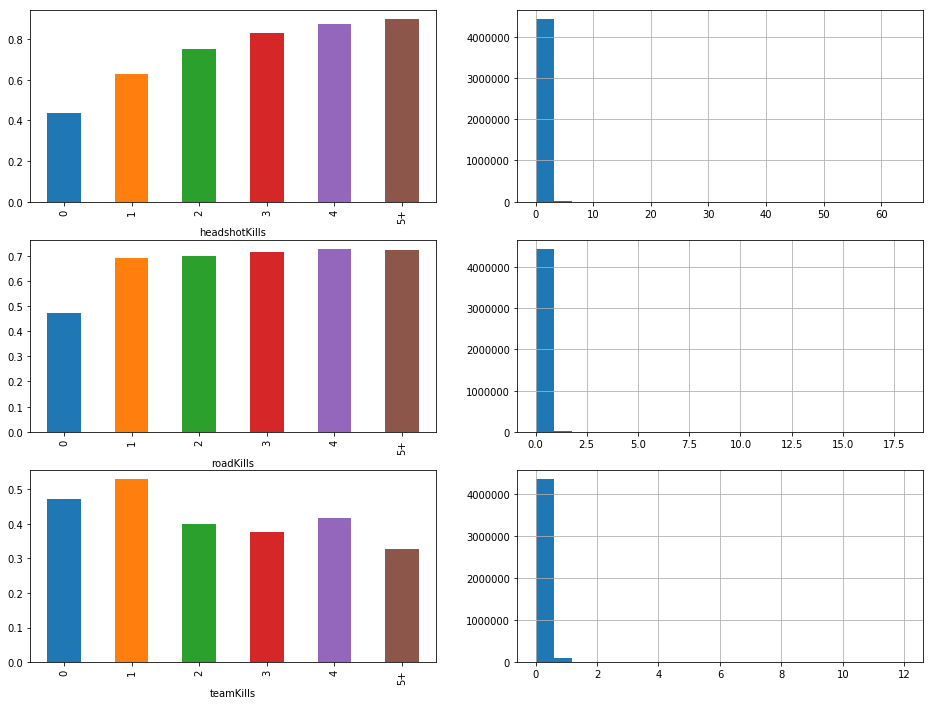

In [38]:
fig, ax = plt.subplots(3, 2, figsize=(16, 12))

cols = ['headshotKills','roadKills','teamKills']
for col, ax in zip(cols, ax):
    sub = train[['winPlacePerc',col]].copy()
    sub.loc[sub[col] >= 5, col] = '5+'  
    sub[col] = sub[col].astype(str)
    sub.groupby(col).mean()['winPlacePerc'].plot.bar(ax=ax[0])
    train[col].hist(bins=20, ax=ax[1])

# assists

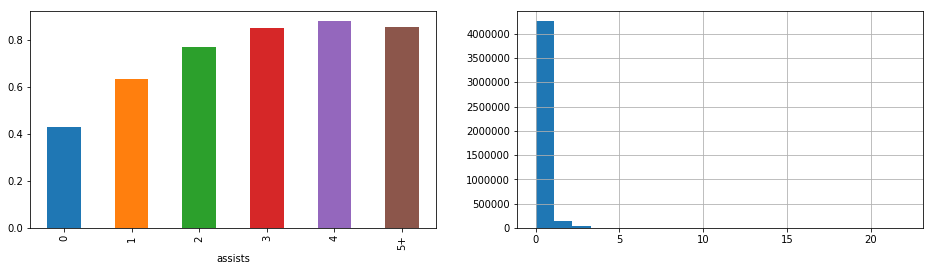

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))

col = 'assists'
sub = train[['winPlacePerc',col]].copy()
sub.loc[sub[col] >= 5, col] = '5+'  
sub[col] = sub[col].astype(str)
sub.groupby(col).mean()['winPlacePerc'].plot.bar(ax=ax[0])
train[col].hist(bins=20, ax=ax[1])

In [40]:
pd.concat([train[train['matchType'] == 'solo'].describe()['assists'],
           train[train['matchType'] != 'solo'].describe()['assists']],
          keys=['solo','team'], axis=1).T

,count,mean,std,min,25%,50%,75%,max
solo,"720,712.0000",0.0622,0.2975,0.0000,0.0000,0.0000,0.0000,22.0000
team,"3,726,253.0000",0.2670,0.6241,0.0000,0.0000,0.0000,0.0000,17.0000


# longestKill

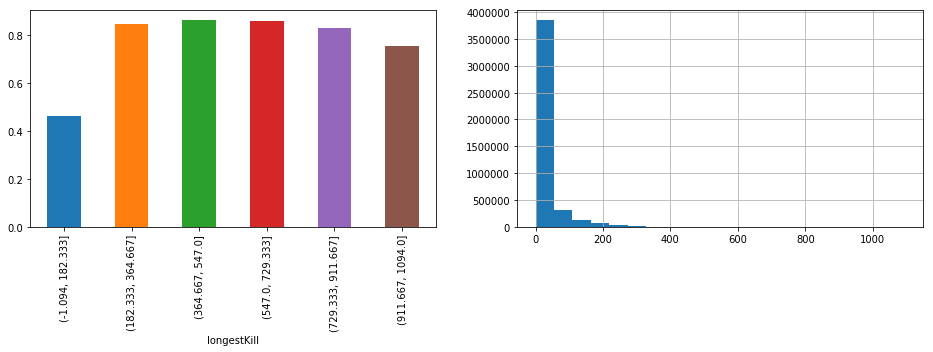

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))

col = 'longestKill'
sub = train[['winPlacePerc',col]].copy()
sub[col] = pd.cut(sub[col], 6)
sub.groupby(col).mean()['winPlacePerc'].plot.bar(ax=ax[0])
train[col].hist(bins=20, ax=ax[1])

# damageDealt

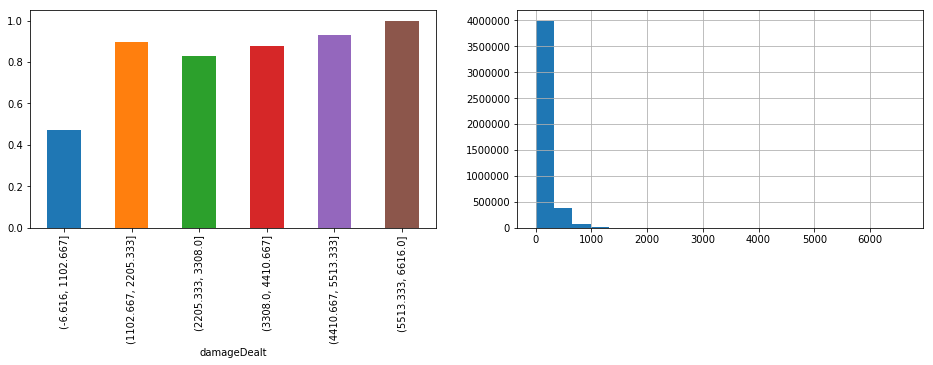

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))

col = 'damageDealt'
sub = train[['winPlacePerc',col]].copy()
sub[col] = pd.cut(sub[col], 6)
sub.groupby(col).mean()['winPlacePerc'].plot.bar(ax=ax[0])
train[col].hist(bins=20, ax=ax[1])

In [43]:
train.query('damageDealt == 0 & (kills > 0 | DBNOs > 0)')[
    ['damageDealt','kills','DBNOs','headshotKills','roadKills','teamKills']].head(20)

,damageDealt,kills,DBNOs,headshotKills,roadKills,teamKills
150,0.0000,0,1,0,0,1
589,0.0000,0,1,0,0,0
707,0.0000,0,1,0,0,0
892,0.0000,1,0,0,0,0
942,0.0000,1,0,0,0,0
949,0.0000,0,1,0,0,2
1011,0.0000,0,1,0,0,0
1468,0.0000,0,2,0,0,1
1625,0.0000,0,1,0,0,1
2111,0.0000,0,1,0,0,1


# walkDistance, rideDistance, swimDistance

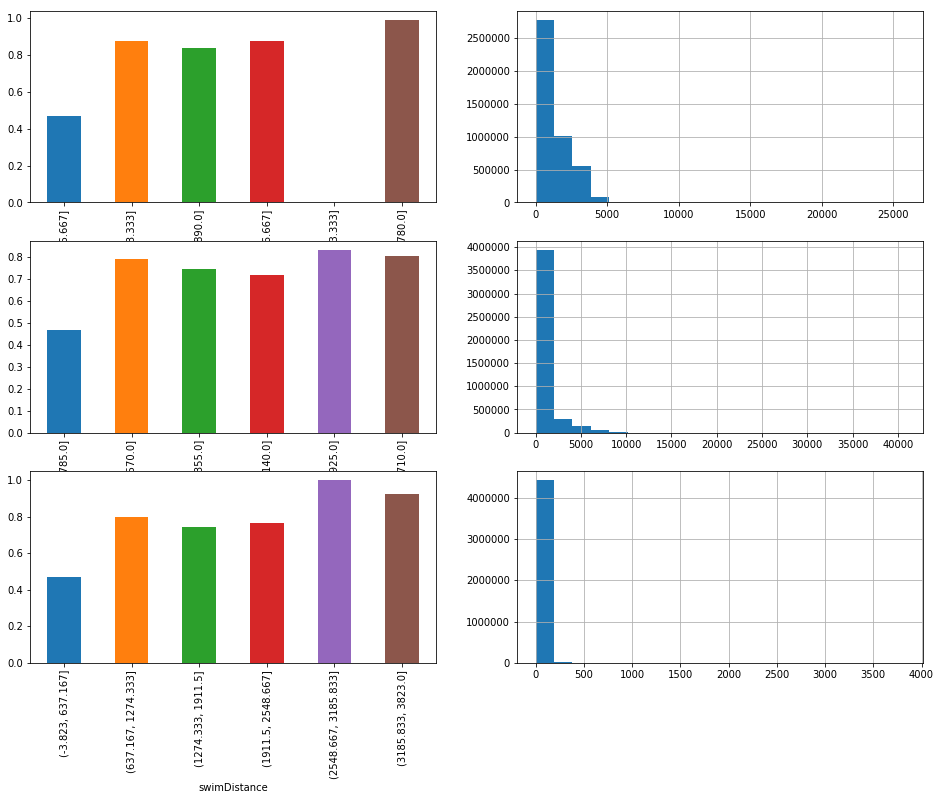

In [44]:
fig, ax = plt.subplots(3, 2, figsize=(16, 12))

cols = ['walkDistance', 'rideDistance', 'swimDistance']
for col, ax in zip(cols, ax):
    sub = train[['winPlacePerc',col]].copy()
    sub[col] = pd.cut(sub[col], 6)
    sub.groupby(col).mean()['winPlacePerc'].plot.bar(ax=ax[0])
    train[col].hist(bins=20, ax=ax[1])

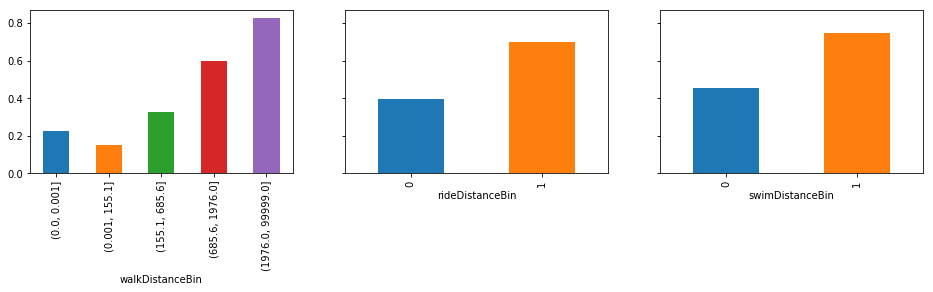

In [45]:
sub = train[['walkDistance','rideDistance','swimDistance','winPlacePerc']].copy()
walk = train['walkDistance']
sub['walkDistanceBin'] = pd.cut(walk, [0, 0.001, walk.quantile(.25), walk.quantile(.5), walk.quantile(.75), 99999])
sub['rideDistanceBin'] = (train['rideDistance'] > 0).astype(int)
sub['swimDistanceBin'] = (train['swimDistance'] > 0).astype(int)

fig, ax = plt.subplots(1, 3, figsize=(16, 3), sharey=True)
sub.groupby('walkDistanceBin').mean()['winPlacePerc'].plot.bar(ax=ax[0])
sub.groupby('rideDistanceBin').mean()['winPlacePerc'].plot.bar(ax=ax[1])
sub.groupby('swimDistanceBin').mean()['winPlacePerc'].plot.bar(ax=ax[2])
del sub, walk

In [46]:
# zombie
sub = train.query('walkDistance == 0 & kills == 0 & weaponsAcquired == 0 & \'solo\' in matchType')
print('count:', len(sub), ' winPlacePerc:', round(sub['winPlacePerc'].mean(),3))

count: 18154  winPlacePerc: 0.053


In [47]:
#cheater
sq = 'kills > 3 & (headshotKills / kills) >= 0.8'
sub = train.query(sq)
print(sq, '\n count:', len(sub), ' winPlacePerc:', round(sub['winPlacePerc'].mean(),3))

kills > 3 & (headshotKills / kills) >= 0.8 
 count: 3859  winPlacePerc: 0.824


# killPoints, rankPoints, winPoints

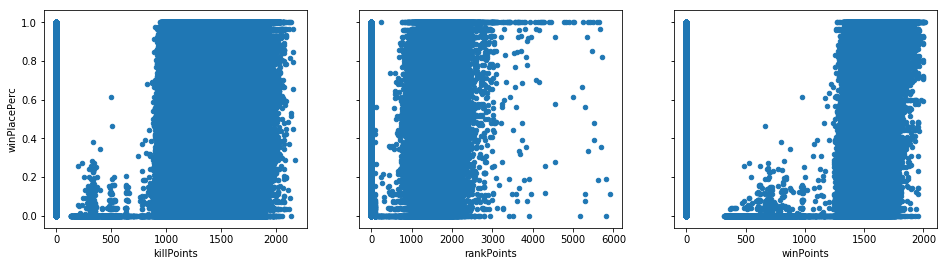

In [48]:
fig, ax = plt.subplots(1, 3, figsize=(16, 4), sharey=True)

cols = ['killPoints','rankPoints','winPoints']
for col, ax in zip(cols, ax.ravel()): 
    train.plot.scatter(x=col, y='winPlacePerc', ax=ax)

In [49]:
# rankPoint: being deprecated
# killPoints,winPoints: If there is a value other than -1 in rankPoints, then any 0 should be treated as a “None”.
sign = lambda x: 'p<=0' if x <= 0 else 'p>0'
pd.concat([
    pd.crosstab(train['rankPoints'].apply(sign), train['winPoints'].apply(sign), margins=False),
    pd.crosstab(train['rankPoints'].apply(sign), train['killPoints'].apply(sign), margins=False)
], keys=['winPoints','killPoints'], axis=1)

winPoints          killPoints         
winPoints       p<=0      p>0       p<=0      p>0
rankPoints                                       
p<=0               0  1791319          0  1791319
p>0          2655646        0    2655646        0

# winPlacePerc

In [50]:
train['winPlacePerc'].describe()

count   4,446,965.0000
mean            0.4728
std             0.3068
min             0.0000
25%             0.2000
50%             0.4583
75%             0.7407
max             1.0000
Name: winPlacePerc, dtype: float64

In [52]:
# confirm unique winPlace in group
nuniquePlace = train.groupby(['matchId','groupId'])['winPlacePerc'].nunique()
print('not unique winPlace in group:', len(nuniquePlace[nuniquePlace > 1]))
del nuniquePlace

not unique winPlace in group: 0


# Feature Engineering

In [50]:
all_data = train.append(test, sort=False).reset_index(drop=True)
del train, test
gc.collect()

127

In [51]:
#rank as percent¶
match = all_data.groupby('matchId')
all_data['killsPerc'] = match['kills'].rank(pct=True).values
all_data['killPlacePerc'] = match['killPlace'].rank(pct=True).values
all_data['walkDistancePerc'] = match['walkDistance'].rank(pct=True).values
#all_data['damageDealtPerc'] = match['damageDealt'].rank(pct=True).values
all_data['walkPerc_killsPerc'] = all_data['walkDistancePerc'] / all_data['killsPerc']

In [52]:
all_data.shape

(4446965, 33)

In [53]:
#distance
all_data['_totalDistance'] = all_data['rideDistance'] + all_data['walkDistance'] + all_data['swimDistance']

In [54]:
#new feature
def fillInf(df, val):
    numcols = df.select_dtypes(include='number').columns
    cols = numcols[numcols != 'winPlacePerc']
    df[df == np.Inf] = np.NaN
    df[df == np.NINF] = np.NaN
    for c in cols: df[c].fillna(val, inplace=True)

In [55]:
all_data['_healthItems'] = all_data['heals'] + all_data['boosts']
all_data['_headshotKillRate'] = all_data['headshotKills'] / all_data['kills']
all_data['_killPlaceOverMaxPlace'] = all_data['killPlace'] / all_data['maxPlace']
all_data['_killsOverWalkDistance'] = all_data['kills'] / all_data['walkDistance']
#all_data['_killsOverDistance'] = all_data['kills'] / all_data['_totalDistance']
#all_data['_walkDistancePerSec'] = all_data['walkDistance'] / all_data['matchDuration']

fillInf(all_data, 0)

In [56]:
#drop feature
all_data.drop(['boosts','heals','killStreaks','DBNOs'], axis=1, inplace=True)
all_data.drop(['headshotKills','roadKills','vehicleDestroys'], axis=1, inplace=True)
all_data.drop(['rideDistance','swimDistance','matchDuration'], axis=1, inplace=True)
all_data.drop(['rankPoints','killPoints','winPoints'], axis=1, inplace=True)

In [57]:
#group
match = all_data.groupby(['matchId'])
group = all_data.groupby(['matchId','groupId','matchType'])

# target feature (max, min)
agg_col = list(all_data.columns)
exclude_agg_col = ['Id','matchId','groupId','matchType','maxPlace','numGroups','winPlacePerc']
for c in exclude_agg_col:
    agg_col.remove(c)
print(agg_col)

# target feature (sum)
sum_col = ['kills','killPlace','damageDealt','walkDistance','_healthItems']

['assists', 'damageDealt', 'killPlace', 'kills', 'longestKill', 'revives', 'teamKills', 'walkDistance', 'weaponsAcquired', 'killsPerc', 'killPlacePerc', 'walkDistancePerc', 'walkPerc_killsPerc', '_totalDistance', '_healthItems', '_headshotKillRate', '_killPlaceOverMaxPlace', '_killsOverWalkDistance']


In [58]:
''' match sum, match max, match mean, group sum
'''
match_data = pd.concat([
    match.size().to_frame('m.players'), 
    match[sum_col].sum().rename(columns=lambda s: 'm.sum.' + s), 
    match[sum_col].max().rename(columns=lambda s: 'm.max.' + s),
    match[sum_col].mean().rename(columns=lambda s: 'm.mean.' + s)
    ], axis=1).reset_index()
match_data = pd.merge(match_data, 
    group[sum_col].sum().rename(columns=lambda s: 'sum.' + s).reset_index())
match_data = reduce_mem_usage(match_data)

print(match_data.shape)

Memory usage of dataframe is 350.06 MB --> 247.66 MB (Decreased by 29.3%)
(2497015, 24)


In [66]:
''' ranking of kills and killPlace in each match
'''
minKills = all_data.sort_values(['matchId','groupId','kills','killPlace']).groupby(
    ['matchId','groupId','kills']).first().reset_index().copy()
for n in np.arange(4):
    c = 'kills_' + str(n) + '_Place'
    nKills = (minKills['kills'] == n)
    minKills.loc[nKills, c] = minKills[nKills].groupby(['matchId'])['killPlace'].rank().values
    match_data = pd.merge(match_data, minKills[nKills][['matchId','groupId',c]], how='left')
    #match_data[c].fillna(0, inplace=True)
match_data = reduce_mem_usage(match_data)
del minKills, nKills

print(match_data.shape)

Memory usage of dataframe is 377.81 MB --> 333.36 MB (Decreased by 11.8%)
(2912982, 28)


In [59]:
match_data.head()

,matchId,m.players,m.sum.kills,m.sum.killPlace,m.sum.damageDealt,m.sum.walkDistance,m.sum._healthItems,m.max.kills,m.max.killPlace,m.max.damageDealt,m.max.walkDistance,m.max._healthItems,m.mean.kills,m.mean.killPlace,m.mean.damageDealt,m.mean.walkDistance,m.mean._healthItems,groupId,matchType,sum.kills,sum.killPlace,sum.damageDealt,sum.walkDistance,sum._healthItems
0,0000a43bce5eec,95,90.0000,"4,560.0000","13,539.7715","119,082.7891",224.0000,7,95,983.7000,"3,438.0000",16,0.9474,48.0000,142.5239,"1,253.5031",2.3579,18b16ec699d8b6,squad,2.0000,82.0000,219.3500,263.3700,2.0000
1,0000a43bce5eec,95,90.0000,"4,560.0000","13,539.7715","119,082.7891",224.0000,7,95,983.7000,"3,438.0000",16,0.9474,48.0000,142.5239,"1,253.5031",2.3579,236ab9e9c081b9,squad,0.0000,543.0000,287.9300,119.5910,0.0000
2,0000a43bce5eec,95,90.0000,"4,560.0000","13,539.7715","119,082.7891",224.0000,7,95,983.7000,"3,438.0000",16,0.9474,48.0000,142.5239,"1,253.5031",2.3579,3a6addfa0df938,squad,0.0000,189.0000,0.0000,9.6360,0.0000
3,0000a43bce5eec,95,90.0000,"4,560.0000","13,539.7715","119,082.7891",224.0000,7,95,983.7000,"3,438.0000",16,0.9474,48.0000,142.5239,"1,253.5031",2.3579,4bf06994bd4c9a,squad,0.0000,59.0000,23.4000,770.4000,1.0000
4,0000a43bce5eec,95,90.0000,"4,560.0000","13,539.7715","119,082.7891",224.0000,7,95,983.7000,"3,438.0000",16,0.9474,48.0000,142.5239,"1,253.5031",2.3579,4bf06994bd4c9a,squad-fpp,0.0000,60.0000,0.0000,347.7000,0.0000


In [60]:
''' group mean, max, min
'''
all_data = pd.concat([
    group.size().to_frame('players'),
    group.mean(),
    group[agg_col].max().rename(columns=lambda s: 'max.' + s),
    group[agg_col].min().rename(columns=lambda s: 'min.' + s),
    ], axis=1).reset_index()
all_data = reduce_mem_usage(all_data)

print(all_data.shape)

Memory usage of dataframe is 781.08 MB --> 507.23 MB (Decreased by 35.1%)
(2497015, 61)


In [61]:
numcols = all_data.select_dtypes(include='number').columns.values
numcols = numcols[numcols != 'winPlacePerc']

In [62]:
''' match summary, max
'''
all_data = pd.merge(all_data, match_data)
del match_data
gc.collect()

all_data['enemy.players'] = all_data['m.players'] - all_data['players']
for c in sum_col:
    #all_data['enemy.' + c] = (all_data['m.sum.' + c] - all_data['sum.' + c]) / all_data['enemy.players']
    #all_data['p.sum_msum.' + c] = all_data['sum.' + c] / all_data['m.sum.' + c]
    #all_data['p.max_mmean.' + c] = all_data['max.' + c] / all_data['m.mean.' + c]
    all_data['p.max_msum.' + c] = all_data['max.' + c] / all_data['m.sum.' + c]
    all_data['p.max_mmax.' + c] = all_data['max.' + c] / all_data['m.max.' + c]
    all_data.drop(['m.sum.' + c, 'm.max.' + c], axis=1, inplace=True)
    
fillInf(all_data, 0)
print(all_data.shape)

(2497015, 83)


In [63]:
''' match rank
'''
match = all_data.groupby('matchId')
matchRank = match[numcols].rank(pct=True).rename(columns=lambda s: 'rank.' + s)
all_data = reduce_mem_usage(pd.concat([all_data, matchRank], axis=1))
rank_col = matchRank.columns
del matchRank
gc.collect()

# instead of rank(pct=True, method='dense')
match = all_data.groupby('matchId')
matchRank = match[rank_col].max().rename(columns=lambda s: 'max.' + s).reset_index()
all_data = pd.merge(all_data, matchRank)
for c in numcols:
    all_data['rank.' + c] = all_data['rank.' + c] / all_data['max.rank.' + c]
    all_data.drop(['max.rank.' + c], axis=1, inplace=True)
del matchRank
gc.collect()

print(all_data.shape)

Memory usage of dataframe is 1836.01 MB --> 1264.49 MB (Decreased by 31.1%)
(2497015, 140)


In [64]:
''' TODO: incomplete
''' 
killMinorRank = all_data[['matchId','min.kills','max.killPlace']].copy()
group = killMinorRank.groupby(['matchId','min.kills'])
killMinorRank['rank.minor.maxKillPlace'] = group.rank(pct=True).values
all_data = pd.merge(all_data, killMinorRank)

killMinorRank = all_data[['matchId','max.kills','min.killPlace']].copy()
group = killMinorRank.groupby(['matchId','max.kills'])
killMinorRank['rank.minor.minKillPlace'] = group.rank(pct=True).values
all_data = pd.merge(all_data, killMinorRank)

del killMinorRank
gc.collect()

70

In [65]:
# drop constant column
constant_column = [col for col in all_data.columns if all_data[col].nunique() == 1]
print('drop columns:', constant_column)
all_data.drop(constant_column, axis=1, inplace=True)

drop columns: ['rank.maxPlace', 'rank.numGroups']


In [66]:
'''
solo  <-- solo,solo-fpp,normal-solo,normal-solo-fpp
duo   <-- duo,duo-fpp,normal-duo,normal-duo-fpp,crashfpp,crashtpp
squad <-- squad,squad-fpp,normal-squad,normal-squad-fpp,flarefpp,flaretpp
'''
all_data['matchType'] = all_data['matchType'].apply(mapper)

all_data = pd.concat([all_data, pd.get_dummies(all_data['matchType'])], axis=1)
all_data.drop(['matchType'], axis=1, inplace=True)

all_data['matchId'] = all_data['matchId'].apply(lambda x: int(x,16))
all_data['groupId'] = all_data['groupId'].apply(lambda x: int(x,16))

In [67]:
null_cnt = all_data.isnull().sum().sort_values()
print(null_cnt[null_cnt > 0])

winPlacePerc    714398
dtype: int64


In [68]:
#all_data.drop([],axis=1,inplace=True)

cols = [col for col in all_data.columns if col not in ['Id','matchId','groupId']]
for i, t in all_data.loc[:, cols].dtypes.iteritems():
    if t == object:
        all_data[i] = pd.factorize(all_data[i])[0]

all_data = reduce_mem_usage(all_data)
all_data.head()

Memory usage of dataframe is 1271.64 MB --> 1274.02 MB (Decreased by -0.2%)


,matchId,groupId,players,assists,damageDealt,killPlace,kills,longestKill,maxPlace,numGroups,revives,teamKills,walkDistance,weaponsAcquired,winPlacePerc,killsPerc,killPlacePerc,walkDistancePerc,walkPerc_killsPerc,_totalDistance,_healthItems,_headshotKillRate,_killPlaceOverMaxPlace,_killsOverWalkDistance,max.assists,max.damageDealt,max.killPlace,max.kills,max.longestKill,max.revives,max.teamKills,max.walkDistance,max.weaponsAcquired,max.killsPerc,max.killPlacePerc,max.walkDistancePerc,max.walkPerc_killsPerc,max._totalDistance,max._healthItems,max._headshotKillRate,max._killPlaceOverMaxPlace,max._killsOverWalkDistance,min.assists,min.damageDealt,min.killPlace,min.kills,min.longestKill,min.revives,min.teamKills,min.walkDistance,min.weaponsAcquired,min.killsPerc,min.killPlacePerc,min.walkDistancePerc,min.walkPerc_killsPerc,min._totalDistance,min._healthItems,min._headshotKillRate,min._killPlaceOverMaxPlace,min._killsOverWalkDistance,m.players,m.mean.kills,m.mean.killPlace,m.mean.damageDealt,m.mean.walkDistance,m.mean._healthItems,sum.kills,sum.killPlace,sum.damageDealt,sum.walkDistance,sum._healthItems,enemy.players,p.max_msum.kills,p.max_mmax.kills,p.max_msum.killPlace,p.max_mmax.killPlace,p.max_msum.damageDealt,p.max_mmax.damageDealt,p.max_msum.walkDistance,p.max_mmax.walkDistance,p.max_msum._healthItems,p.max_mmax._healthItems,rank.players,rank.assists,rank.damageDealt,rank.killPlace,rank.kills,rank.longestKill,rank.revives,rank.teamKills,rank.walkDistance,rank.weaponsAcquired,rank.killsPerc,rank.killPlacePerc,rank.walkDistancePerc,rank.walkPerc_killsPerc,rank._totalDistance,rank._healthItems,rank._headshotKillRate,rank._killPlaceOverMaxPlace,rank._killsOverWalkDistance,rank.max.assists,rank.max.damageDealt,rank.max.killPlace,rank.max.kills,rank.max.longestKill,rank.max.revives,rank.max.teamKills,rank.max.walkDistance,rank.max.weaponsAcquired,rank.max.killsPerc,rank.max.killPlacePerc,rank.max.walkDistancePerc,rank.max.walkPerc_killsPerc,rank.max._totalDistance,rank.max._healthItems,rank.max._headshotKillRate,rank.max._killPlaceOverMaxPlace,rank.max._killsOverWalkDistance,rank.min.assists,rank.min.damageDealt,rank.min.killPlace,rank.min.kills,rank.min.longestKill,rank.min.revives,rank.min.teamKills,rank.min.walkDistance,rank.min.weaponsAcquired,rank.min.killsPerc,rank.min.killPlacePerc,rank.min.walkDistancePerc,rank.min.walkPerc_killsPerc,rank.min._totalDistance,rank.min._healthItems,rank.min._headshotKillRate,rank.min._killPlaceOverMaxPlace,rank.min._killsOverWalkDistance,rank.minor.maxKillPlace,rank.minor.minKillPlace,duo,solo,squad
0,705378017004,6950488777545910,2,0.0000,109.6750,41.0000,1.0000,6.2750,28.0000,28.0000,0.0000,0.0000,131.6850,1.0000,0.3333,0.5737,0.4316,0.3158,0.7631,131.6850,1.0000,0.0000,1.4643,0.0135,0,200.0000,61,2,12.5500,0,0,189.4000,1,0.8263,0.6421,0.4000,1.2459,189.4000,1,0.0000,2.1786,0.0270,0,19.3500,21,0,0.0000,0,0,73.9700,1,0.3211,0.2211,0.2316,0.2803,73.9700,1,0.0000,0.7500,0.0000,95,0.9474,48.0000,142.5239,"1,253.5031",2.3579,2.0000,82.0000,219.3500,263.3700,2.0000,93,0.0222,0.2857,0.0134,0.6421,0.0148,0.2033,0.0016,0.0551,0.0045,0.0625,0.5667,0.3222,0.5778,0.4111,0.7000,0.5778,0.3667,0.5000,0.3111,0.1333,0.6667,0.4111,0.2444,0.2667,0.2889,0.4222,0.3778,0.4111,1.0000,0.3222,0.6778,0.6667,0.7444,0.6000,0.3667,0.5000,0.3111,0.0889,0.7444,0.6667,0.3111,0.5556,0.2889,0.3778,0.3820,0.6667,1.0000,0.4222,0.4222,0.3333,0.3778,0.3778,0.4667,1.0000,0.2247,0.1889,0.3778,0.3333,0.2247,0.0889,0.2222,0.5667,0.4556,0.3333,0.3778,0.5455,1.0000,0.0000,0.0000,1.0000
1,705378017004,9968970908074425,6,0.0000,47.9883,90.5000,0.0000,0.0000,28.0000,28.0000,0.0000,0.0000,19.9318,0.8333,0.0370,0.3211,0.9526,0.0851,0.2650,19.9318,0.0000,0.0000,3.2321,0.0000,0,121.3000,93,0,0.0000,0,0,56.1600,1,0.3211,0.9789,0.2000,0.6230,56.1600,0,0.0000,3.3214,0.0000,0,0.0000,88,0,0.0000,0,0,0.0000,0,0.3211,0.9263,0.0158,0.0492,0.0000,0,0.0000,3.1429,0.0000,95,0.9474,48.0000,142.5239,"1,253.5031",2.3579,0.0000,543.0000,287.9300,119.5910,0.

# predict

In [81]:
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import minmax_scale

In [94]:
import lightgbm as lgb

In [95]:
X_train = all_data[all_data['winPlacePerc'].notnull()].reset_index(drop=True)
X_test = all_data[all_data['winPlacePerc'].isnull()].drop(['winPlacePerc'], axis=1).reset_index(drop=True)
del all_data
gc.collect()

372

In [96]:
Y_train = X_train.pop('winPlacePerc')
X_test_grp = X_test[['matchId','groupId']].copy()
train_matchId = X_train['matchId']

# drop matchId,groupId
X_train.drop(['matchId','groupId'], axis=1, inplace=True)
X_test.drop(['matchId','groupId'], axis=1, inplace=True)

print(X_train.shape, X_test.shape)

(1782617, 139) (714398, 139)


In [97]:
print(pd.DataFrame([[val for val in dir()], [sys.getsizeof(eval(val)) for val in dir()]],
                   index=['name','size']).T.sort_values('size', ascending=False).reset_index(drop=True)[:10])

             name        size
0          train1  1541887831
1           Train  1447562762
2         X_train   903786923
3        features   426908752
4             _23   367149418
5          X_test   362199890
6             _12   320181520
7  train_features   320181520
8             _13   320181520
9               X   231242204


In [98]:
params={'learning_rate': 0.1,
        'objective':'mae',
        'metric':'mae',
        'num_leaves': 31,
        'verbose': 1,
        'random_state':42,
        'bagging_fraction': 0.7,
        'feature_fraction': 0.7
       }

reg = lgb.LGBMRegressor(**params, n_estimators=1000)
reg.fit(X_train, Y_train)
pred = reg.predict(X_test, num_iteration=reg.best_iteration_)

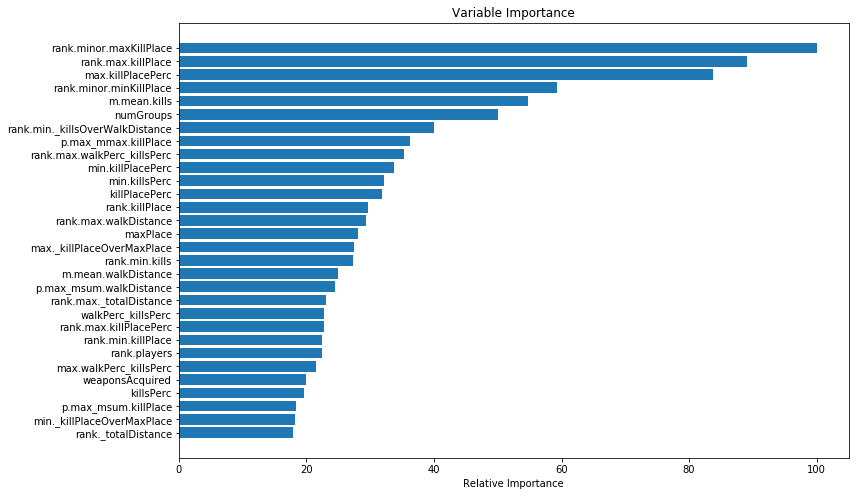

In [99]:
# Plot feature importance
feature_importance = reg.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
sorted_idx = sorted_idx[len(feature_importance) - 30:]
pos = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize=(12,8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [100]:
X_train.columns[np.argsort(-feature_importance)].values

array(['rank.minor.maxKillPlace', 'rank.max.killPlace',
       'max.killPlacePerc', 'rank.minor.minKillPlace', 'm.mean.kills',
       'numGroups', 'rank.min._killsOverWalkDistance',
       'p.max_mmax.killPlace', 'rank.max.walkPerc_killsPerc',
       'min.killPlacePerc', 'min.killsPerc', 'killPlacePerc',
       'rank.killPlace', 'rank.max.walkDistance', 'maxPlace',
       'max._killPlaceOverMaxPlace', 'rank.min.kills',
       'm.mean.walkDistance', 'p.max_msum.walkDistance',
       'rank.max._totalDistance', 'walkPerc_killsPerc',
       'rank.max.killPlacePerc', 'rank.min.killPlace', 'rank.players',
       'max.walkPerc_killsPerc', 'weaponsAcquired', 'killsPerc',
       'p.max_msum.killPlace', 'min._killPlaceOverMaxPlace',
       'rank._totalDistance', 'rank.walkPerc_killsPerc',
       'rank._killsOverWalkDistance', 'rank.walkDistance', 'killPlace',
       'min.walkPerc_killsPerc', 'm.mean._healthItems',
       'm.mean.damageDealt', 'rank.killsPerc', 'max.killsPerc',
       'rank.min.a

In [101]:
X_test_grp['_nofit.winPlacePerc'] = pred

group = X_test_grp.groupby(['matchId'])
X_test_grp['winPlacePerc'] = pred
X_test_grp['_rank.winPlacePerc'] = group['winPlacePerc'].rank(method='min')
X_test = pd.concat([X_test, X_test_grp], axis=1)

In [102]:
fullgroup = (X_test['numGroups'] == X_test['maxPlace'])

# full group (201366) --> calculate from rank
subset = X_test.loc[fullgroup]
X_test.loc[fullgroup, 'winPlacePerc'] = (subset['_rank.winPlacePerc'].values - 1) / (subset['maxPlace'].values - 1)

# not full group (684872) --> align with maxPlace
subset = X_test.loc[~fullgroup]
gap = 1.0 / (subset['maxPlace'].values - 1)
new_perc = np.around(subset['winPlacePerc'].values / gap) * gap  # half&up
X_test.loc[~fullgroup, 'winPlacePerc'] = new_perc

X_test['winPlacePerc'] = X_test['winPlacePerc'].clip(lower=0,upper=1)

In [103]:
# edge cases
X_test.loc[X_test['maxPlace'] == 0, 'winPlacePerc'] = 0
X_test.loc[X_test['maxPlace'] == 1, 'winPlacePerc'] = 1  # nothing
X_test.loc[(X_test['maxPlace'] > 1) & (X_test['numGroups'] == 1), 'winPlacePerc'] = 0
X_test['winPlacePerc'].describe()

count   714,398.0000
mean          0.4308
std           0.2913
min           0.0000
25%           0.1786
50%           0.3929
75%           0.6667
max           1.0000
Name: winPlacePerc, dtype: float64

In [104]:
train = Train.copy()
train.dropna(inplace=True)
train1 = train.copy()
test = train1[:1111742]
print(test.shape)

(1111742, 29)


In [105]:
y = test[["Id","winPlacePerc"]]

,Id,winPlacePerc
0,7f96b2f878858a,0.4444
1,eef90569b9d03c,0.6400
2,1eaf90ac73de72,0.7755
3,4616d365dd2853,0.1667
4,315c96c26c9aac,0.1875
5,ff79c12f326506,0.0370
6,95959be0e21ca3,0.0000
7,311b84c6ff4390,0.7368
8,1a68204ccf9891,0.3704
9,e5bb5a43587253,0.2143


In [108]:
y["winPlacePercT"] = y["winPlacePerc"]
y.drop(['winPlacePerc'], axis=1, inplace=True)

,Id,winPlacePercT
0,7f96b2f878858a,0.4444
1,eef90569b9d03c,0.6400
2,1eaf90ac73de72,0.7755
3,4616d365dd2853,0.1667
4,315c96c26c9aac,0.1875
5,ff79c12f326506,0.0370
6,95959be0e21ca3,0.0000
7,311b84c6ff4390,0.7368
8,1a68204ccf9891,0.3704
9,e5bb5a43587253,0.2143


In [109]:
test.drop(['winPlacePerc'], axis=1, inplace=True)
test.shape

(1111742, 28)

In [110]:
test['matchId'] = test['matchId'].apply(lambda x: int(x,16))
test['groupId'] = test['groupId'].apply(lambda x: int(x,16))

In [111]:
submission = pd.merge(test, X_test[['matchId','groupId','winPlacePerc']])
submission = submission[['Id','winPlacePerc']]

In [112]:
submission

,Id,winPlacePerc
0,7f96b2f878858a,0.4444
1,7516514fbd1091,0.4444
2,eef90569b9d03c,0.5600
3,3dcf4259b62f66,0.5600
4,4616d365dd2853,0.2000
5,315c96c26c9aac,0.1771
6,ff79c12f326506,0.0370
7,ab998f8ad6854c,0.0370
8,95959be0e21ca3,0.0000
9,3b67fecd86f85a,0.0000


In [113]:
alll = pd.merge(submission,y,how='left',on='Id')

In [115]:
alll['diff'] = abs(alll['winPlacePerc']-alll['winPlacePercT'])

In [118]:
alll

,Id,winPlacePerc,winPlacePercT,diff
0,7f96b2f878858a,0.4444,0.4444,0.0000
1,7516514fbd1091,0.4444,0.4444,0.0000
2,eef90569b9d03c,0.5600,0.6400,0.0800
3,3dcf4259b62f66,0.5600,0.6400,0.0800
4,4616d365dd2853,0.2000,0.1667,0.0333
5,315c96c26c9aac,0.1771,0.1875,0.0104
6,ff79c12f326506,0.0370,0.0370,0.0000
7,ab998f8ad6854c,0.0370,0.0370,0.0000
8,95959be0e21ca3,0.0000,0.0000,0.0000
9,3b67fecd86f85a,0.0000,0.0000,0.0000


In [117]:
alll.describe()

,winPlacePerc,winPlacePercT,diff
count,"903,067.0000","903,067.0000","903,067.0000"
mean,0.4175,0.4789,0.0872
std,0.2922,0.3050,0.1317
min,0.0000,0.0000,0.0000
25%,0.1667,0.2093,0.0104
50%,0.3750,0.4643,0.0370
75%,0.6531,0.7449,0.0869
max,1.0000,1.0000,1.0000


In [119]:
Train[Train.Id =='e61cd4b5cb8122']

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
1111711,e61cd4b5cb8122,b7feca63cdb936,91aa551b4b76a6,1,4,329.7000,1,1,1,5,0,3,1,55.6200,1363,squad-fpp,25,25,1514,0,233.0000,0,0.0000,0,0,"3,452.0000",5,0,0.9583


In [ ]:
# trueResult = test[["Id","winPlacePerc"]]
# trueResult["winPlacePercT"] = trueResult["winPlacePerc"]
# trueResult.drop(['winPlacePerc'], axis=1, inplace=True)
# print(trueResult.shape)